<a href="https://colab.research.google.com/github/HuynhPhamNhatNam/DataAnalystAndDeepLearning/blob/main/Labs/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING**

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó,  hiển thị ra màn hình 10 dòng đầu tiên.

In [1]:
import pandas as pd
titanic  =  pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv')
titanic.head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]

2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age,   Cabin và Embarked

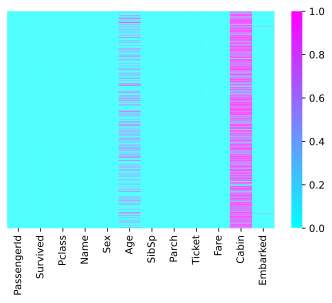

In [2]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format =  'svg'
sns.heatmap(titanic.isna(),  
            yticklabels =  False,  
            cmap =  'cool')

3. Xử lý tên cột tên Name,   tách ra làm 2 cột: firstName và secondName.


In [4]:
titanic[['firstName', 'secondName']] = titanic['Name'].str.split(',',  expand  =  True)


In [5]:
titanic = titanic.drop('Name', axis  =  1)


In [6]:
titanic.head(3)


PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina

[3 rows x 13 columns]

1. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male M và female F

In [7]:
titanic['Sex']  =  titanic['Sex'].replace({'male':'M',  'female':'F'})
titanic

PassengerId  ...                                   secondName
0              1  ...                              Mr. Owen Harris
1              2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2              3  ...                                  Miss. Laina
3              4  ...           Mrs. Jacques Heath (Lily May Peel)
4              5  ...                            Mr. William Henry
..           ...  ...                                          ...
886          887  ...                                  Rev. Juozas
887          888  ...                         Miss. Margaret Edith
888          889  ...               Miss. Catherine Helen "Carrie"
889          890  ...                              Mr. Karl Howell
890          891  ...                                  Mr. Patrick

[891 rows x 13 columns]

2. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau:

*   Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó,   hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

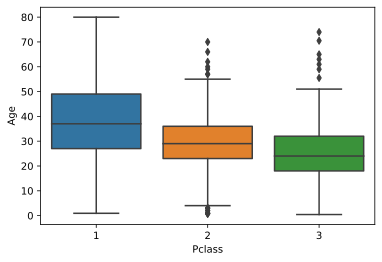

In [8]:
import seaborn as sns
sns.boxplot(y  =  'Age',  x  =  'Pclass',  data  =  titanic)

In [9]:
titanic['Age'].fillna(titanic['Age'].mean(),  inplace  =  True)
titanic

PassengerId  ...                                   secondName
0              1  ...                              Mr. Owen Harris
1              2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2              3  ...                                  Miss. Laina
3              4  ...           Mrs. Jacques Heath (Lily May Peel)
4              5  ...                            Mr. William Henry
..           ...  ...                                          ...
886          887  ...                                  Rev. Juozas
887          888  ...                         Miss. Margaret Edith
888          889  ...               Miss. Catherine Helen "Carrie"
889          890  ...                              Mr. Karl Howell
890          891  ...                                  Mr. Patrick

[891 rows x 13 columns]

*   Sau đó,   hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột ‘Age‘ bằng biểu đồ Heat map.



In [10]:
%matplotlib inline
%config InlineBackend.figure_format  =  'svg'
sns.heatmap(titanic.isna(),  
            yticklabels  =  False,  
            cmap  =  'cool')

1. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau:



*   (age  = < 12]   =  Kid
*   (12,  18]   =  Teen
*   (18,  60]: Adult
*   ( age > 60): Older



In [13]:
for i in titanic['Age']:
  titanic.loc[(titanic['Age']) <= 12,'Age Group'] = 'Kid'
  titanic.loc[(titanic['Age'] > 12) & (titanic['Age'] <= 18),'Age Group'] = 'Teen'
  titanic.loc[(titanic['Age'] > 18)&(titanic['Age'] <= 60),'Age Group'] = 'Adult'
  titanic.loc[(titanic['Age'] > 60),'Age Group'] = 'Older'

In [14]:
titanic.head(10)


PassengerId  Survived  ...                                   secondName Age Group
0            1         0  ...                              Mr. Owen Harris     Adult
1            2         1  ...   Mrs. John Bradley (Florence Briggs Thayer)     Adult
2            3         1  ...                                  Miss. Laina     Adult
3            4         1  ...           Mrs. Jacques Heath (Lily May Peel)     Adult
4            5         0  ...                            Mr. William Henry     Adult
5            6         0  ...                                    Mr. James     Adult
6            7         0  ...                                Mr. Timothy J     Adult
7            8         0  ...                        Master. Gosta Leonard       Kid
8            9         1  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Adult
9           10         1  ...                  Mrs. Nicholas (Adele Achem)      Teen

[10 rows x 14 columns]

2. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,  Mrs,  Miss,  Master ra khỏi ―secondName

In [15]:
titanic[['namePrefix',  'SecondName']]  =  titanic['secondName'].str.split('. ',  1,  expand  =  True)
titanic  =  titanic.drop('secondName',  axis  =  1)
titanic.head(4)


PassengerId  Survived  ...  namePrefix                             SecondName
0            1         0  ...          Mr                            Owen Harris
1            2         1  ...         Mrs  John Bradley (Florence Briggs Thayer)
2            3         1  ...        Miss                                  Laina
3            4         1  ...         Mrs          Jacques Heath (Lily May Peel)

[4 rows x 15 columns]

In [16]:
#Sap xep lai
titanic   =   titanic[['PassengerId',  'namePrefix',  'namePrefix',  'SecondName',  'Survived',  'Pclass',  'Sex',  'Age',  'SibSp',  'Parch',  'Ticket',  'Fare',  'Cabin',  'Embarked',  'Age Group']]
titanic.head(10)


PassengerId namePrefix namePrefix  ... Cabin  Embarked  Age Group
0            1         Mr         Mr  ...   NaN         S      Adult
1            2        Mrs        Mrs  ...   C85         C      Adult
2            3       Miss       Miss  ...   NaN         S      Adult
3            4        Mrs        Mrs  ...  C123         S      Adult
4            5         Mr         Mr  ...   NaN         S      Adult
5            6         Mr         Mr  ...   NaN         Q      Adult
6            7         Mr         Mr  ...   E46         S      Adult
7            8     Master     Master  ...   NaN         S        Kid
8            9        Mrs        Mrs  ...   NaN         S      Adult
9           10        Mrs        Mrs  ...   NaN         C       Teen

[10 rows x 15 columns]

3. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size   =  1+ SibSp + Parch


In [17]:
titanic['familySize']   =  1 + titanic['SibSp'] + titanic['Parch']
titanic.head(10)


PassengerId namePrefix namePrefix  ... Embarked  Age Group  familySize
0            1         Mr         Mr  ...        S      Adult           2
1            2        Mrs        Mrs  ...        C      Adult           2
2            3       Miss       Miss  ...        S      Adult           1
3            4        Mrs        Mrs  ...        S      Adult           2
4            5         Mr         Mr  ...        S      Adult           1
5            6         Mr         Mr  ...        Q      Adult           1
6            7         Mr         Mr  ...        S      Adult           1
7            8     Master     Master  ...        S        Kid           5
8            9        Mrs        Mrs  ...        S      Adult           3
9           10        Mrs        Mrs  ...        C       Teen           2

[10 rows x 16 columns]

4. Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize   =  0 thì giá trị Alone   =  1 và ngược lại là 0.



In [20]:
import numpy as np
titanic['Alone'] = [1 if i == 0 else 0 for i in titanic['familySize']]

In [21]:
titanic

PassengerId namePrefix namePrefix  ... Age Group  familySize  Alone
0              1         Mr         Mr  ...     Adult           2      0
1              2        Mrs        Mrs  ...     Adult           2      0
2              3       Miss       Miss  ...     Adult           1      0
3              4        Mrs        Mrs  ...     Adult           2      0
4              5         Mr         Mr  ...     Adult           1      0
..           ...        ...        ...  ...       ...         ...    ...
886          887        Rev        Rev  ...     Adult           1      0
887          888       Miss       Miss  ...     Adult           1      0
888          889       Miss       Miss  ...     Adult           4      0
889          890         Mr         Mr  ...     Adult           1      0
890          891         Mr         Mr  ...     Adult           1      0

[891 rows x 17 columns]

5. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown



In [22]:
titanic['typeCabin'] = titanic['Cabin'].str.extract('(\D)', expand = True)
titanic.head(10)

PassengerId namePrefix namePrefix  ... familySize  Alone  typeCabin
0            1         Mr         Mr  ...          2      0        NaN
1            2        Mrs        Mrs  ...          2      0          C
2            3       Miss       Miss  ...          1      0        NaN
3            4        Mrs        Mrs  ...          2      0          C
4            5         Mr         Mr  ...          1      0        NaN
5            6         Mr         Mr  ...          1      0        NaN
6            7         Mr         Mr  ...          1      0          E
7            8     Master     Master  ...          5      0        NaN
8            9        Mrs        Mrs  ...          3      0        NaN
9           10        Mrs        Mrs  ...          2      0        NaN

[10 rows x 18 columns]

In [23]:
titanic['typeCabin'] = titanic['typeCabin'].fillna('Unknown')
titanic

PassengerId namePrefix namePrefix  ... familySize  Alone  typeCabin
0              1         Mr         Mr  ...          2      0    Unknown
1              2        Mrs        Mrs  ...          2      0          C
2              3       Miss       Miss  ...          1      0    Unknown
3              4        Mrs        Mrs  ...          2      0          C
4              5         Mr         Mr  ...          1      0    Unknown
..           ...        ...        ...  ...        ...    ...        ...
886          887        Rev        Rev  ...          1      0    Unknown
887          888       Miss       Miss  ...          1      0          B
888          889       Miss       Miss  ...          4      0    Unknown
889          890         Mr         Mr  ...          1      0          C
890          891         Mr         Mr  ...          1      0    Unknown

[891 rows x 18 columns]

# **PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA**

1. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng (Survived) trên từng nhóm giới tính (Sex).


In [24]:
val = titanic.groupby(['Survived', 'Sex']).agg({'Sex':'count'}).rename(columns = {'Sex':'COUNT'})
val

COUNT
Survived Sex       
0        F       81
         M      468
1        F      233
         M      109

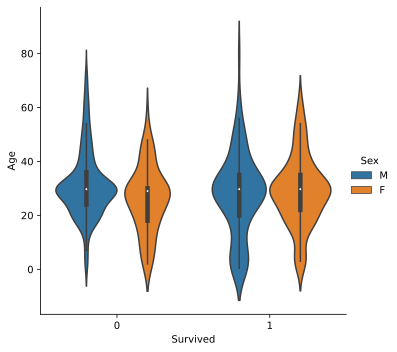

In [25]:
import seaborn as sns
sns.catplot(x = "Survived",  y = "Age",  hue = "Sex", data = titanic,  kind = "violin")


In [26]:
sns.displot(titanic, x = 'Age', col = 'Survived', kde = True)


2. Trực quan thông tin hành khách sống sót (Survived) trên từng nhóm phân loại hành khách (Pclass)

In [27]:
titanic.groupby(['Survived', 'Pclass']).agg({'Survived':'count'}).rename(columns = {'Survived':'COUNT'})


COUNT
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

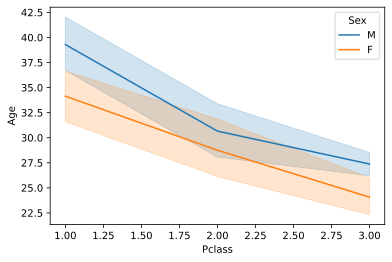

In [28]:
sns.lineplot(x = "Pclass",  y = "Age", hue = "Sex", data = titanic)


3. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác (Agegroup)



In [29]:
sur_sex_agegroup = titanic.groupby(['Survived', 'Sex', 'Age Group']).agg({'Survived':'count'}).rename(columns = {'Survived':'COUNT'})


In [30]:
unstack_sur_sex_agegroup = sur_sex_agegroup.unstack()
unstack_sur_sex_agegroup


COUNT                  
Age Group     Adult   Kid Older  Teen
Survived Sex                         
0        F     59.0  13.0   NaN   9.0
         M    404.0  16.0  17.0  31.0
1        F    184.0  19.0   3.0  27.0
         M     83.0  21.0   2.0   3.0

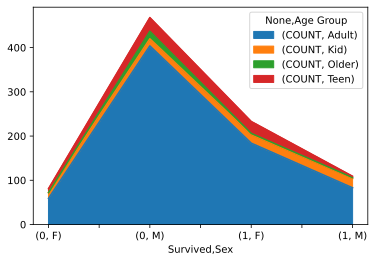

In [31]:
unstack_sur_sex_agegroup.plot.area()


4. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm (familySize)đi cùng



In [32]:
sur_familysize = titanic.groupby(['Survived', 'familySize']).agg({'Survived':'count'}).rename(columns = {'Survived':'COUNT'})
sur_familysize

COUNT
Survived familySize       
0        1             374
         2              72
         3              43
         4               8
         5              12
         6              19
         7               8
         8               6
         11              7
1        1             163
         2              89
         3              59
         4              21
         5               3
         6               3
         7               4

In [33]:
sur_familysize_unstack = sur_familysize.unstack()
sur_familysize_unstack


COUNT                                             
familySize     1     2     3     4     5     6    7    8    11
Survived                                                      
0           374.0  72.0  43.0   8.0  12.0  19.0  8.0  6.0  7.0
1           163.0  89.0  59.0  21.0   3.0   3.0  4.0  NaN  NaN

In [34]:
sns.catplot(x = 'Survived', y = 'familySize', kind = 'swarm', data = titanic)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


5. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé (Fare)



In [35]:
sur_fare = titanic.groupby(['Survived', 'Fare']).agg({'Survived':'count'}).rename({'Survived':'COUNT'})


In [36]:
sur_fare_unstack = sur_fare.unstack()
sur_fare_unstack


Survived                    ...                           
Fare     0.0000   4.0125   5.0000    ... 262.3750 263.0000 512.3292
Survived                             ...                           
0            14.0      1.0      1.0  ...      NaN      2.0      NaN
1             1.0      NaN      NaN  ...      2.0      2.0      3.0

[2 rows x 248 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


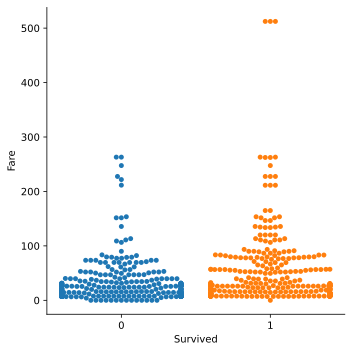

In [37]:
sns.catplot(x = "Survived",  y = "Fare",  kind = "swarm", data = titanic)


6. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến (Embarked).



In [38]:
sur_pclass_emb = titanic.groupby(['Survived', 'Pclass', 'Embarked']).agg({'Survived':'count'}).rename(columns = {'Survived':'COUNT'})
sur_pclass_emb_unstack = sur_pclass_emb.unstack()
sur_pclass_emb_unstack

COUNT         
Embarked            C   Q    S
Survived Pclass               
0        1         26   1   53
         2          8   1   88
         3         41  45  286
1        1         59   1   74
         2          9   2   76
         3         25  27   67

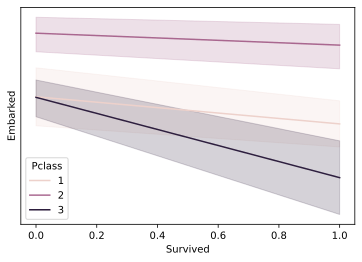

In [39]:
sns.lineplot(x = "Survived",  y = "Embarked", hue = "Pclass", data = titanic)
